# Hello TensorFlow

Welcome to my TensorFlow tutorial, I made it to teach an introduction to this library for the Artificial Neural Network Class.

You can learn yourself Tensorflow from its own web page [Get Started](https://www.tensorflow.org/get_started/)

## Installing

You can find many options to install TensorFlow in your enviroment from the source [Install](https://www.tensorflow.org/install/)

If you are lazy, follow my instructions :)

Install TensorFlow using pip:

pip install TensorFlow

Is that it?

Yes, that's all. Now you can test if you have do it ok, importing the library using:

In [1]:
import tensorflow as tf

We imported TensorFlow with the alias tf, now we can access to all the methods and classes. If you have problems importing tensorflow, consider to resintall tensorflow, use a virtual enviroment, use conda, if you are in unix like linux o MacOs, use sudo before pip, example: sudo pip install TensorFlow.

## Tensors

If you want to know about tensors, there is always a link in the official web page [Tensors](https://www.tensorflow.org/programmers_guide/tensors)

But I will teach my own way.

Tensors are multidimensional arrays, a tensor has the properties:
    - Shape
    - Datatype: int32, float32, string, etc.
Let's create variables o tensors.


In [2]:
string1 = tf.Variable('Hello1', tf.string)
string2 = tf.Variable('hello2')
int1 = tf.Variable(5)
int2 = tf.Variable(6, tf.int16)
int3 = tf.Variable(3, tf.int32)
float1 = tf.Variable(5.0)
float2 = tf.Variable(6.0, tf.float32)

Now let's print this variables

In [3]:
from __future__ import print_function

In [4]:
string1, string2

(<tf.Variable 'Variable:0' shape=() dtype=string_ref>,
 <tf.Variable 'Variable_1:0' shape=() dtype=string_ref>)

We can see the we can specify or not the type o variable, tensorflow makes the variable as a string when the string is given as parameter

In [5]:
int1, int2, int3

(<tf.Variable 'Variable_2:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_3:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_4:0' shape=() dtype=int32_ref>)

if you don't specify the type of a integer, tensorflow creates a int32 variable, integers can not be int16 in systems with 64 bits.

In [6]:
float1, float2

(<tf.Variable 'Variable_5:0' shape=() dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=() dtype=float32_ref>)

The same happens with the float variables

## Tensors n-dimensions

In [7]:
rank0 = tf.Variable(1)
rank1= tf.Variable([1, 2])
rank2 = tf.Variable([[1, 2],
                     [3, 4]])

We can continue creating variables with n dimensions and we can not finish
The most commons variables are rank 2, 3, and 4
- 2 when you have a data set with n features and m instances n x m, example: the iris data set
- 3 normally used when the instances are images in gray scale 
- 4 in data sets when the images are in rgb

In [8]:
rank3 = tf.zeros([10, 28, 28]) # 10 images in gray scale size 28 x 28
rank4 = tf.zeros([10, 32, 32, 3]) # 10  images in rgb size 32 x 32

## I can not see the values of my tensors

All variables are created but the values are not computed yet, to compute a value you need to create a session and initialize all variables with the next code.

In [9]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

values = sess.run([rank0, rank1, rank2])

sess.close()

values

[1, array([1, 2], dtype=int32), array([[1, 2],
        [3, 4]], dtype=int32)]

## PlaceHolder
A placeholder is a variable that will get a value later, like the inputs values in a model

In [10]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
add = tf.add(x, y)

# now in a session we put this values as input

sess = tf.Session()

add_value = sess.run(add, {x: 5, y: 8})

add_value

13.0

add is the value we want and x and y are placeholders and we can choose their values later.

## Create a linear model

I will not teach you anything new, remember there is always a link for everything: [Get started](https://www.tensorflow.org/get_started/get_started) this example is the best to learn how TensorFlow works.

The formule is y = m * x + b
where:
    y: is the variable we want to predict
    x: is the explanatory variable
    b: is the slope
    m: is the intercept (the value of y when x = 0)

In [11]:
w = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)
yp = w * x + b

Now lets evaluate our model

In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

predicted = sess.run(yp, {x: [1, 2, 3, 4]})

predicted

array([ 0.        ,  0.30000001,  0.60000002,  0.90000004], dtype=float32)

Now we have our model, we need to evaluate how good it is. We calculate the evaluation using the sum of the square of the deltas between yp and y provided for us.

In [13]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(yp - y)
loss = tf.reduce_sum(squared_deltas)

y_expected = [0, -1, -2, -3]

x_values = [1, 2, 3, 4]

loss_value = sess.run(loss, {x: x_values, y: y_expected})

loss_value

23.66

The loss is not good, must be around 0.

## Plotting

It's always good to visualize and compare our results instead of seeing just numbers

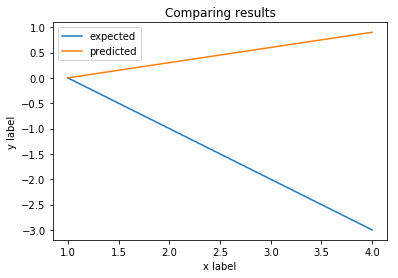

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_values, y_expected, label='expected')
plt.plot(x_values, predicted, label='predicted')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title('Comparing results')
plt.legend()
plt.show()

## Time to train
Tensorflow privides the class train that contains optimizar to reduce the loss in our model, here we will use the Gradient Descent.

In [15]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
sess.run(init) # reset values to incorrect defaults.
for i in range(1000):
  sess.run(train, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})

w_value, b_value = sess.run([w, b])

w_value = float(w_value)

b_value = float(b_value)

w_value, b_value

(-0.9999969005584717, 0.9999908208847046)

This model trained provided the correct values for w and b, these are our weights to use in the model and calculate again the loss:
the value for w is almost -1 and for b almost 1, so let's assing this values

In [16]:
fixW = tf.assign(w, [w_value])
fixb = tf.assign(b, [b_value])
sess.run([fixW, fixb])
loss_value = sess.run(loss, {x: x_values, y: y_expected})

loss_value

5.6999738e-11

Now our loss function is almost 0, that means that our train almost provided the almost the correct values for w and b.

Now we can predict values and visualize a new plot:

## Better results

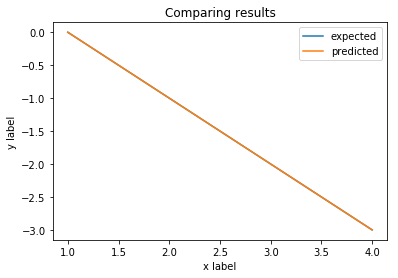

In [17]:
predicted = sess.run(yp, {x: x_values})

plt.plot(x_values, y_expected, label='expected')
plt.plot(x_values, predicted, label='predicted')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title('Comparing results')
plt.legend()
plt.show()

In [18]:
predicted

array([ -6.07967377e-06,  -1.00000298e+00,  -1.99999988e+00,
        -2.99999666e+00], dtype=float32)

We were expecting 0, -1, -2 and -3, we almost g

## estimator class
This class provides a linear model already made, we just feed the model with the values of x and y.

In [19]:
import numpy as np

# Our only feature is x

feature_columns = [tf.feature_column.numeric_column("x", shape=[1])]

# Create the estimator

estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)

# let's use numpy to create our train and eval values
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])

# These values will not learn the model, this is good to avoid overfitting
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7, 0.])

# this input is to train our model

input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, 
    y_train, 
    batch_size=4, 
    num_epochs=None, 
    shuffle=True)

# this input is to evaluate with the same values

train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, 
    y_train, 
    batch_size=4,
    num_epochs=1000, 
    shuffle=False)

# This input is to evaluate with the values did not learn

eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, 
    y_eval, batch_size=4, 
    num_epochs=1000, 
    shuffle=False)

# Here the model train

estimator.train(input_fn=input_fn, steps=1000)

# Here we evaluate how well our model did.

# With the train inputs
train_metrics = estimator.evaluate(input_fn=train_input_fn)

# With the eval inputs
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpzNZRrv', '_save_summary_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpzNZRrv/model.ckpt.
INFO:tensorflow:loss = 13.0, step = 1
INFO:tensorflow:global_step/sec: 457.005
INFO:tensorflow:loss = 0.521752, step = 101 (0.231 sec)
INFO:tensorflow:global_step/sec: 501.514
INFO:tensorflow:loss = 0.034249, step = 201 (0.197 sec)
INFO:tensorflow:global_step/sec: 498.825
INFO:tensorflow:loss = 0.00281973, step = 301 (0.194 sec)
INFO:tensorflow:global_step/sec: 695.671
INFO:tensorflow:loss = 0.000716422, step = 401 (0.145 sec)
INFO:tensorflow:global_step/sec: 724.297
INFO:tensorflow:loss = 0.000238895, step = 501 (0.142 sec)
INFO:tensorflo

We can see that with the train metrics the loss is almost 0 and less than the eval metrics loss, but the important results are from the eval metrics, because evaluate inputs that the model did not learn

In [20]:
print('Train metrics:')
for key in train_metrics:
    print(key, ':', train_metrics[key])

Train metrics:
average_loss : 2.48734e-08
global_step : 1000
loss : 9.94936e-08


In [21]:
print('Eval metrics:')
for key in eval_metrics:
    print(key, ':', eval_metrics[key])

Eval metrics:
average_loss : 0.00253847
global_step : 1000
loss : 0.0101539
